#1.- Define lo que queremos averiguar de los números del primer premio del Gordo de Navidad.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [2]:
df=pd.read_csv('Lotto.csv')
df=df['3604']

#2.- Valores mínimo, máximo y media aritmética.

In [3]:
lista_num=list(df)
#Hay que actualizar la lista con el número ganador de 2021
lista_num.append(86148)
lista_num.sort()
minimo=lista_num[0]
maximo=lista_num[-1]
media=sum(lista_num)/len(lista_num)
print("Valor mínimo: {}\nValor máximo: {}\nMedia aritmética: {} ".format(minimo,maximo,round(media,0)))

Valor mínimo: 523
Valor máximo: 86148
Media aritmética: 25324.0 


#3.- Mediana.

In [4]:
mediana=statistics.median(lista_num)
print("Mediana: {}".format(mediana))

Mediana: 20000.0


#4.- Moda.

In [5]:
moda=statistics.mode(lista_num)
print("Moda: {}".format(moda))

Moda: 3347


#5.- El rango, varianza, desviación típica, cuartiles y el rango intercuartil.

Rango, Varianza y Desviación Típica

In [6]:
rango=maximo-minimo
varianza=statistics.variance(lista_num)
desviacion_tipica=statistics.stdev(lista_num)
print("Rango: {}\nVarianza: {}\nDesviación típica: {}".format(rango,varianza,desviacion_tipica))

Rango: 85625
Varianza: 406216966.8021104
Desviación típica: 20154.824901301185


Cuartiles

In [7]:
cuartiles=statistics.quantiles(lista_num, n=4)
q1=int(cuartiles[0])
q2=int(cuartiles[1])
q3=int(cuartiles[2])
print("Primer cuartil: {}\nSegundo cuartil: {}\nTercer cuartil: {}".format(q1,q2,q3))

Primer cuartil: 8678
Segundo cuartil: 20000
Tercer cuartil: 39866


Rango intercuartil

In [8]:
rango_intercuartil=q3-q1
print("Rango intercuartil: {}".format(rango_intercuartil))

Rango intercuartil: 31188


#6.- Valores extremos

Para calcular los valores extremos primero hay que definir los límites sobre los que los valores extremos se excederán

In [9]:
limite_inferior=q1-(rango_intercuartil*1.5)
limite_superior=q3+(rango_intercuartil*1.5)
print("El límite inferior es {} y el límite superior es {}".format(limite_inferior,limite_superior))

El límite inferior es -38104.0 y el límite superior es 86648.0


Como el límite inferior es negativo y los números de lotería tienen que ser enteros y positivos, sólo vamos a tomar en cuenta el límite superior

In [10]:
valores_extremos=[x for x in lista_num if x>limite_superior]
print("La lista de valores extremos es: {}".format(valores_extremos))

La lista de valores extremos es: []


#Realiza un visualización gráfica en MatplotLib de los valores más habituales: media, mediana, cuartiles y diagrama de caja y bigotes.

Media

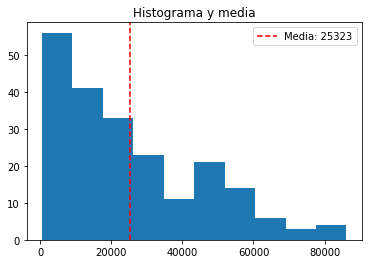

In [16]:
plt.title("Histograma y media")
plt.hist(lista_num)
plt.axvline(media, color="red", linestyle="dashed", label="Media: "+str(int(media)))
plt.legend(loc="upper right")

Mediana

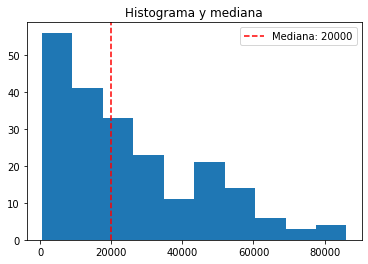

In [14]:
plt.title("Histograma y mediana")
plt.hist(lista_num)
plt.axvline(mediana, color="red", linestyle="dashed", label="Mediana: "+str(int(mediana)))
plt.legend(loc="upper right")

Cuartiles

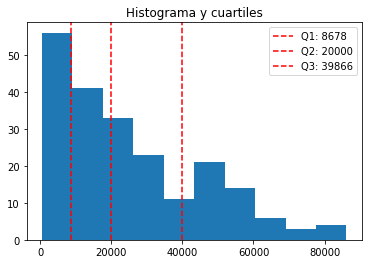

In [17]:
plt.title("Histograma y cuartiles")
plt.hist(lista_num)
plt.axvline(q1, color="red", linestyle="dashed", label="Q1: "+str(int(q1)))
plt.axvline(q2, color="red", linestyle="dashed", label="Q2: "+str(int(q2)))
plt.axvline(q3, color="red", linestyle="dashed", label="Q3: "+str(int(q3)))
plt.legend(loc="upper right")

Diagrama de caja y bigotes

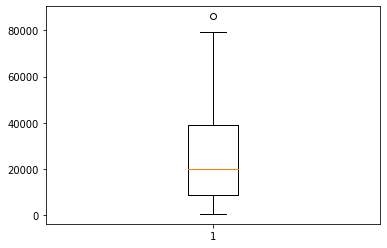

In [19]:
plt.boxplot(lista_num)
plt.show()

#8.- ¿Se trata de una distribución Gaussiana o de Ley normal?

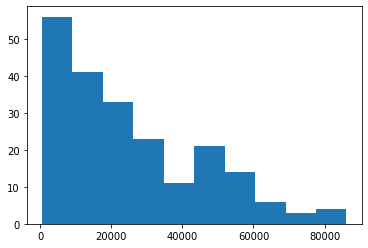

In [21]:
plt.hist(lista_num)
plt.show()

Como se puede apreciar **NO** es una distribución normal o de gaussiana ya que no sigue la forma característica de campana.
Tampoco cumple con los requisitos generales de las distribuciones normales, como el ser simétrica con respecto a la media otener una media, moda y mediana iguales

In [12]:
diccionario={}
for numero in df:
  digito=numero%10
  if digito not in diccionario:
    diccionario[digito]=0
  diccionario[digito]+=1
diccionario=dict(sorted(diccionario.items(), key=lambda item: item[1]))
for clave,valor in diccionario.items():
  print(F"La terminación {clave} ha salido {valor} veces")

La terminación 1 ha salido 8 veces
La terminación 2 ha salido 13 veces
La terminación 9 ha salido 16 veces
La terminación 3 ha salido 21 veces
La terminación 0 ha salido 23 veces
La terminación 8 ha salido 23 veces
La terminación 7 ha salido 24 veces
La terminación 6 ha salido 26 veces
La terminación 4 ha salido 26 veces
La terminación 5 ha salido 31 veces
